# Audio 2: Guitar

This notebook is part of [_The Joy of Jupyter_](https://github.com/mwermelinger/The-Joy-of-Jupyter), an introduction on how to use Jupyter notebooks and what can be done with them. 

This notebook assumes you have read the _Audio 1: Sine waves_ notebook and shows how to synthesise a note on a guitar using the Karplus-Strong algorithm. The [_Guitar Heroine_](http://nifty.stanford.edu/2012/wayne-guitar-heroine/) assignment developed by Kevin Wayne and colleagues provides more details on how and why the algorithm works.

I want to play the C major chord below middle C, for a deeper sound. First I need the note frequencies.

In [1]:
def frequency(steps):
    """Return the frequency of the given note on the equal-tempered scale.
    Steps is an integer, the number of half-notes (up or down) from A4.
    """
    # the frequency of A4 (A above middle C) is 440 Hz
    return 440 * 2 ** (steps / 12)

G3 = frequency(-14) # 1 note (2 steps) and 1 octave (12 steps) below A4
E3 = frequency(-17) # 1.5 notes (3 steps) below G3
C3 = frequency(-21) # 2 notes (4 steps) below E3

I want the chord to be arpeggiated, so I will preceed each note by silence.

In [2]:
def silence(rate, duration):
    """Return silence (a list of zeros) lasting the given duration.
    
    The duration is a float, the number of seconds.
    The rate is a positive integer, the number of samples per second.
    """
    return [0] * round(rate * duration)   

Next the Karplus-Strong algorithm.

In [3]:
import random

def note(frequency, rate, duration):
    """Return the sound of the given note, lasting the given duration.
    
    The returned sound is a list of floats from -1 to 1.
    The duration is a float, the number of seconds.
    The rate is a positive integer, the number of samples per second.
    """
    # initially there is no sound
    samples = silence(rate, 1 / frequency)
    # the guitar string is plucked (random noise)
    for index in range(len(samples)):
        samples[index] = random.uniform(-1, 1)
    # generate the sound for the required duration
    head = 0
    while len(samples) < duration * rate:
        sample = (samples[head] + samples[head+1]) / 2 * 0.994
        samples.append(sample)
        head += 1
    return samples

Now the chord can be put together. I first generate each note, with the right amount of silence beforehand, and then add all the sound waves into a single one.

In [4]:
CD = 44100 # samples per second, CD-quality

c =                  note(C3, CD, 4) # C starts immediately and lasts 4 seconds
e = silence(CD, 1) + note(E3, CD, 3) # E starts 1 second later and lasts for 3
g = silence(CD, 2) + note(G3, CD, 2) # G starts 1 second after E and lasts for 2

sound = silence(CD, 4)
for index in range(len(sound)):
    sound[index] = (c[index] + e[index] + g[index]) / 3

Finally the chord can be played.

In [5]:
from IPython.display import Audio
Audio(sound, rate=CD)

Let's see the sound wave.

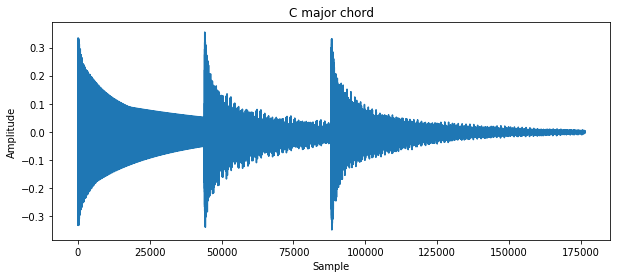

In [6]:
from matplotlib.pyplot import *
%matplotlib inline

figure(figsize=(10,4))
title('C major chord')
xlabel('Sample')
ylabel('Amplitude')
plot(sound)
show()

## Activities

- Play other chords.
- Plot the first hundredth of a second (random noise for the C), and then the first tenth of a second. What can you observe? Why is the initial amplitude between -0.3 and 0.3? Why does it reduce?